# Simple Stock Trendlines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore") 

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
market = 'SPY'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)
benchmark = yf.download(market,start,end)

# View Columns
dataset.head()
benchmark.head()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,216.826019,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,218.115921,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,217.942657,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,218.722412,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,218.000443,46265300


In [3]:
dataset['Returns'] = dataset['Adj Close'].pct_change().dropna()

In [4]:
max_r = dataset['Adj Close'].max()
min_r = dataset['Adj Close'].min()
avg_r = dataset['Adj Close'].mean()

In [5]:
y = [min_r, avg_r, max_r]

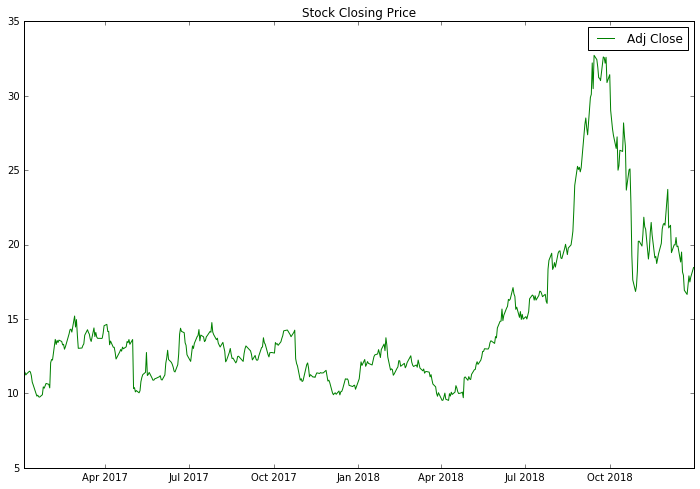

In [6]:
plt.figure(figsize=(12,8))
plt.plot(dataset['Adj Close'], color='green')
plt.title('Stock Closing Price')
plt.legend()
plt.show()

In [7]:
# Normalising Multiple Stocks
benchmark['Normalize'] = benchmark['Adj Close']/benchmark['Adj Close'][0]
dataset['Normalize'] = dataset['Adj Close']/dataset['Adj Close'][0]

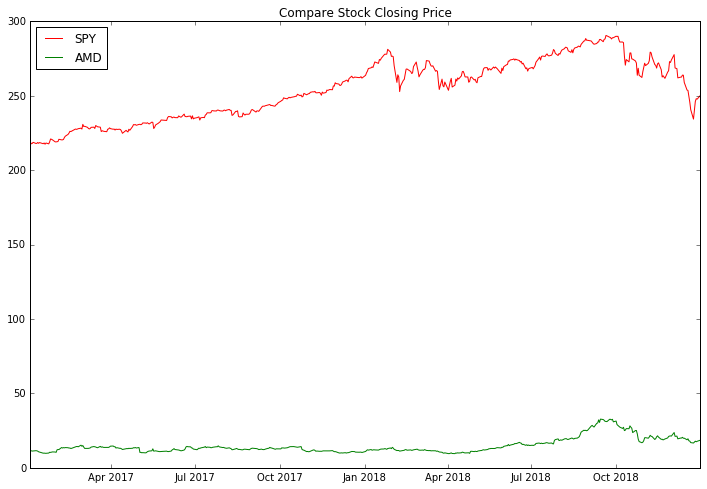

In [8]:
plt.figure(figsize=(12,8))
plt.plot(benchmark['Adj Close'], color='red', label=market)
plt.plot(dataset['Adj Close'], color='green', label=symbol)
plt.title('Compare Stock Closing Price')
plt.legend(loc='best')
plt.show()

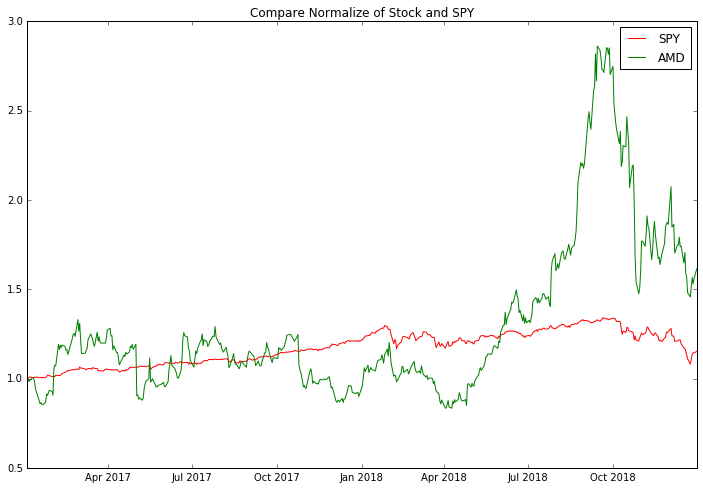

In [9]:
plt.figure(figsize=(12,8))
plt.plot(benchmark['Normalize'], color='red', label=market)
plt.plot(dataset['Normalize'], color='green', label=symbol)
plt.title("Compare Normalize of Stock and SPY")
plt.legend(loc='best')
plt.show()

In [10]:
dataset['Max5'] = dataset['Adj Close'].rolling(5).max()
dataset['Min5'] = dataset['Adj Close'].rolling(5).min()
dataset['Avg5'] = dataset['Adj Close'].rolling(5).mean()

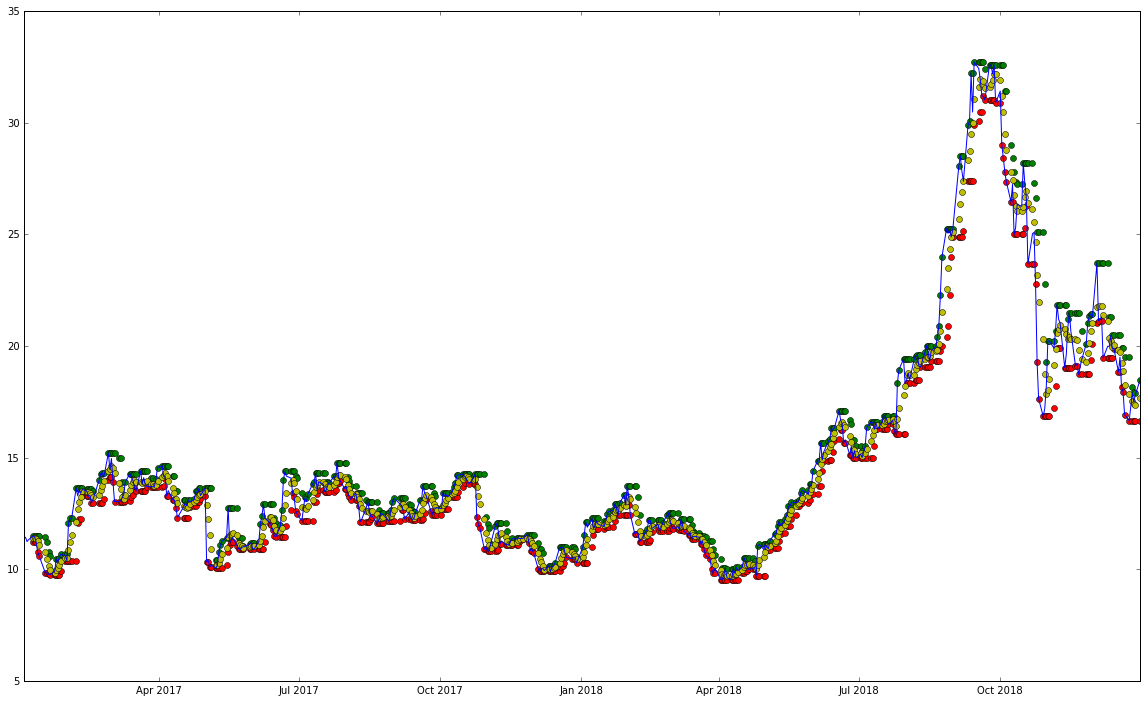

In [11]:
plt.figure(figsize=(20,12))
plt.plot(dataset['Max5'],'go')
plt.plot(dataset['Min5'],'ro')
plt.plot(dataset['Avg5'],'yo')
plt.plot(dataset['Adj Close'], color='blue', label=symbol)
plt.show()

In [12]:
dataset['Adj Close'].index.max()

Timestamp('2018-12-31 00:00:00')

In [13]:
type(dataset.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [14]:
# Number of rows in the data set
print(dataset['Adj Close'].count())

502


In [15]:
max_price = dataset['Adj Close'].max()
print(max_price)

32.720001


In [16]:
min_price = dataset['Adj Close'].min()
print(min_price)

9.53


In [17]:
avg_price = dataset['Adj Close'].mean()
print(avg_price)

14.813087641434256


In [18]:
median_price = dataset['Adj Close'].median()
print(median_price)

13.114999999999998


In [19]:
mode_price = dataset['Adj Close'].mode()
print(mode_price)

0    10.89
dtype: float64


In [20]:
dataset['Adj Close'][dataset['Adj Close'] == max_price].index

DatetimeIndex(['2018-09-14'], dtype='datetime64[ns]', name='Date', freq=None)

In [21]:
dataset.index = pd.to_datetime(dataset.index)
dataset.index 

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=502, freq=None)

In [22]:
dataset['Adj Close'].max()

32.720001000000003

In [23]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Normalize,Max5,Min5,Avg5
Date,,,,,,,,,,,
2017-01-03,11.42,11.65,11.02,11.43,11.43,55182000,NaN,1.000000,NaN,NaN,NaN
2017-01-04,11.45,11.52,11.24,11.43,11.43,40781200,0.000000,1.000000,NaN,NaN,NaN
2017-01-05,11.43,11.69,11.23,11.24,11.24,38855200,-0.016623,0.983377,NaN,NaN,NaN
2017-01-06,11.29,11.49,11.11,11.32,11.32,34453500,0.007117,0.990376,NaN,NaN,NaN
2017-01-09,11.37,11.64,11.31,11.49,11.49,37128000,0.015018,1.005249,11.49,11.24,11.382


In [24]:
adj_close = dataset[['Adj Close']].reset_index()
adj_close.head()

,Date,Adj Close
0,2017-01-03,11.43
1,2017-01-04,11.43
2,2017-01-05,11.24
3,2017-01-06,11.32
4,2017-01-09,11.49


In [25]:
adj_close_max = adj_close[['Date', 'Adj Close']].max()
adj_close_max

Date         2018-12-31 00:00:00
Adj Close                  32.72
dtype: object

In [26]:
dataset['Adj Close'].idxmax()

Timestamp('2018-09-14 00:00:00')

In [27]:
dataset['Adj Close'].idxmin()

Timestamp('2018-04-02 00:00:00')

In [28]:
dataset['Adj Close'].mean(axis=0)

14.813087641434256

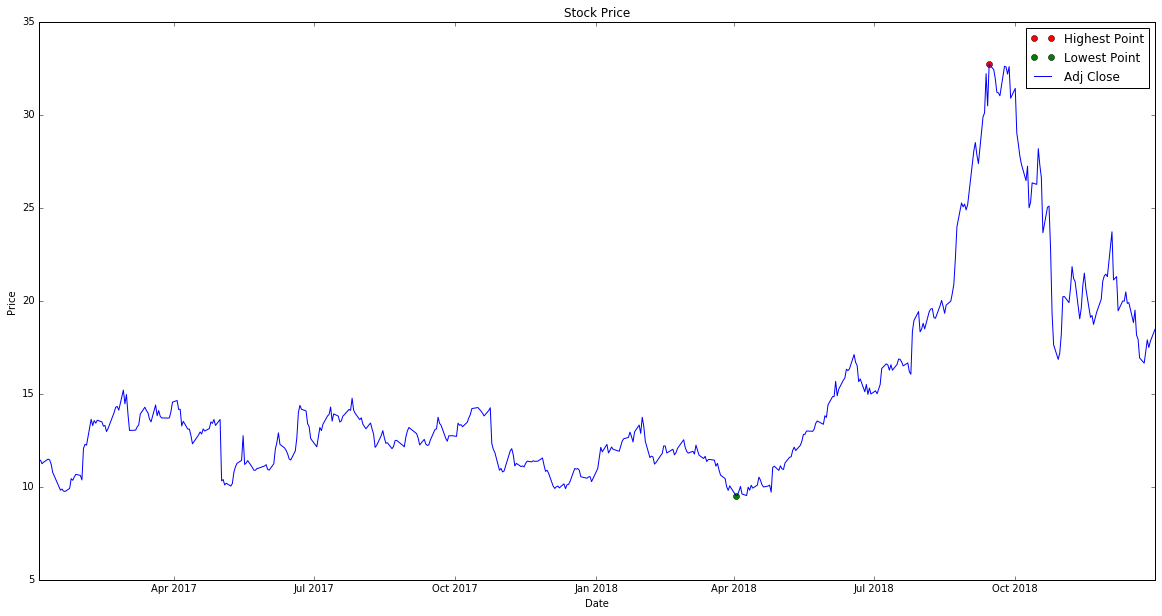

In [29]:
plt.figure(figsize=(20,10))
plt.plot(dataset['Adj Close'].idxmax(), dataset['Adj Close'].max(), 'ro', label='Highest Point')
plt.plot(dataset['Adj Close'].idxmin(), dataset['Adj Close'].min(), 'go', label='Lowest Point')
plt.plot(dataset['Adj Close'], color='blue')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [30]:
def connectpoints():
    x1, x2 = dataset['Adj Close'].idxmin(), dataset['Adj Close'].idxmax()
    y1, y2 = dataset['Adj Close'].min(), dataset['Adj Close'].max()
    plt.plot([x1,x2],[y1,y2],'k-')
    return

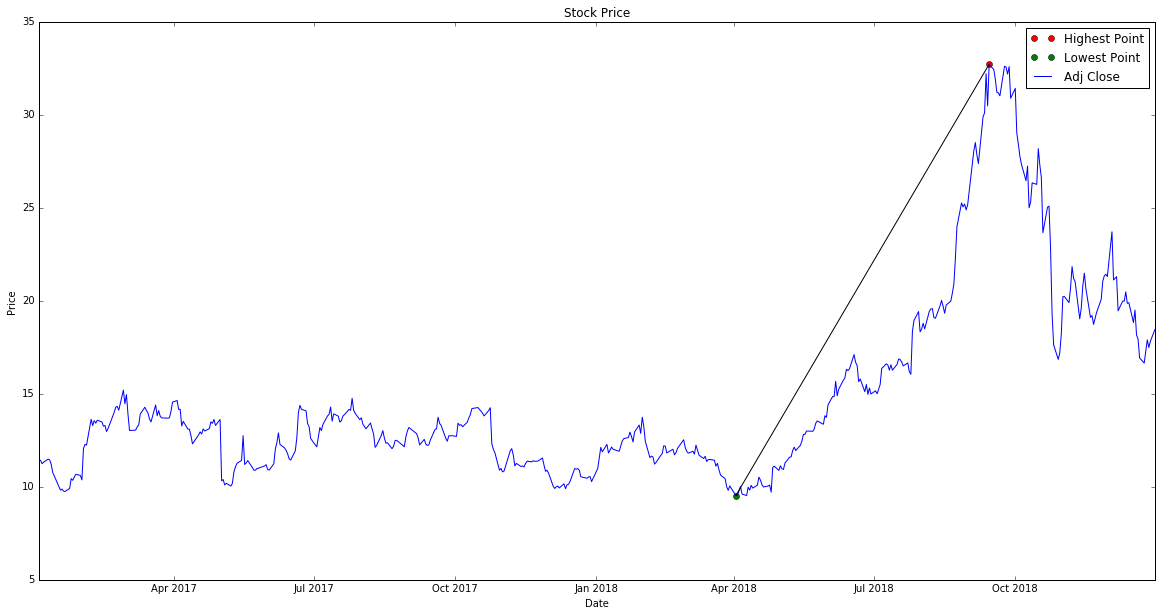

In [31]:
# Connect the points
plt.figure(figsize=(20,10))
plt.plot(dataset['Adj Close'].idxmax(), dataset['Adj Close'].max(), 'ro', label='Highest Point')
plt.plot(dataset['Adj Close'].idxmin(), dataset['Adj Close'].min(), 'go', label='Lowest Point')
plt.plot(dataset['Adj Close'], color='blue')
connectpoints()
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [32]:
# Find Midpoint
midpoint = (dataset['Adj Close'].max() + dataset['Adj Close'].min())/2
# Find Midpoint Date
midpoint_date = dataset['Adj Close'].idxmin() + (dataset['Adj Close'].idxmax() - dataset['Adj Close'].idxmin())/2

In [33]:
midpoint_date

Timestamp('2018-06-23 12:00:00')

In [34]:
dataset['Adj Close'].loc['2018-06-23'] # Does not exist in the index

KeyError: 'the label [2018-06-23] is not in the [index]'

In [35]:
dataset['Adj Close'].loc['2018-06-22'] # Use this date since 2017-02-18 is not on index

15.800000000000001

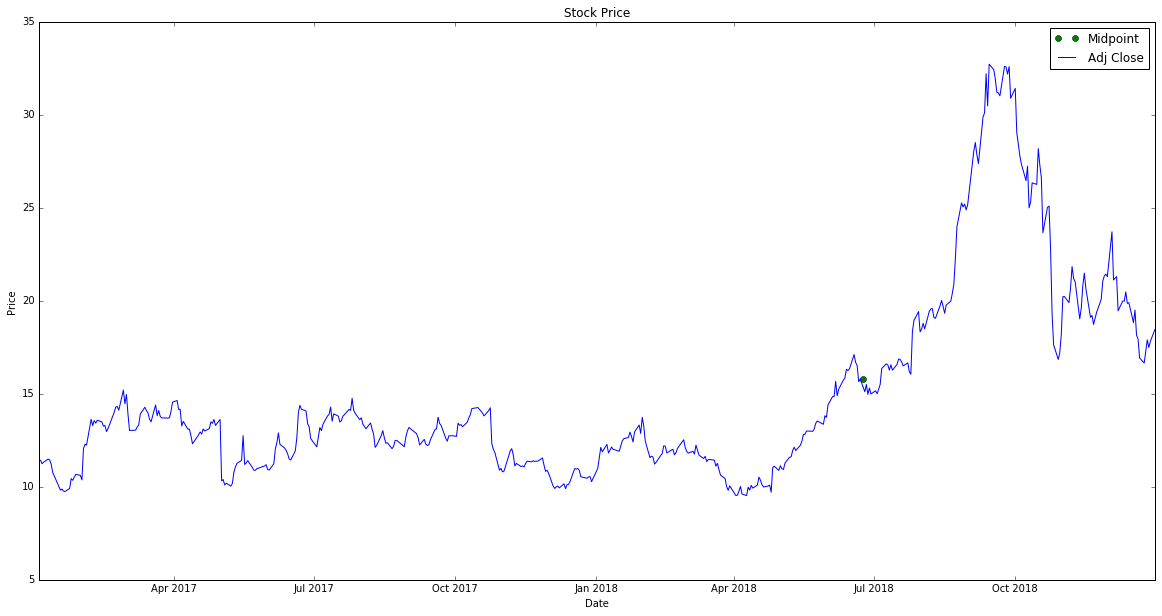

In [36]:
plt.figure(figsize=(20,10))
plt.plot(midpoint_date, dataset['Adj Close'].loc['2018-06-22'],'go', label='Midpoint')
plt.plot(dataset['Adj Close'], color='blue')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [37]:
# Average price
Avg_Price = dataset['Adj Close'].mean()
Avg_Price

14.813087641434256

In [38]:
dataset.loc[dataset['Adj Close'] == 8.16] # Does not have 8.16

,Open,High,Low,Close,Adj Close,Volume,Returns,Normalize,Max5,Min5,Avg5
Date,,,,,,,,,,,


In [39]:
dataset.loc[dataset['Adj Close'] == 15.80] # It has this price on 2018-06-22

,Open,High,Low,Close,Adj Close,Volume,Returns,Normalize,Max5,Min5,Avg5
Date,,,,,,,,,,,
2018-06-22,15.78,15.91,15.56,15.8,15.8,59257100,0.009585,1.382327,17.110001,15.65,16.354


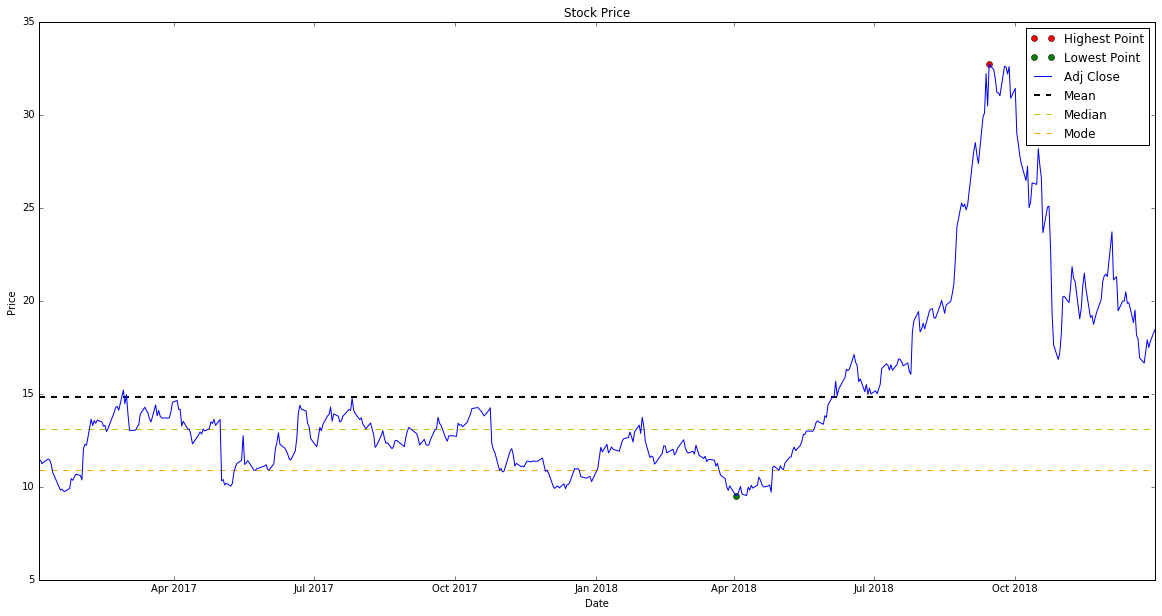

In [40]:
# Plot Horizontal Lines
plt.figure(figsize=(20,10))
plt.hlines(dataset['Adj Close'].mean(), xmin=dataset.index[0], xmax=dataset.index[-1], linewidth=2, label='Mean', linestyle='--')
plt.hlines(dataset['Adj Close'].median(), xmin=dataset.index[0], xmax=dataset.index[-1], color='y', label='Median', linestyle='--')
plt.hlines(dataset['Adj Close'].mode(), xmin=dataset.index[0], xmax=dataset.index[-1], color='orange', label='Mode', linestyle='--')
plt.plot(dataset['Adj Close'].idxmax(), dataset['Adj Close'].max(), 'ro', label='Highest Point')
plt.plot(dataset['Adj Close'].idxmin(), dataset['Adj Close'].min(), 'go', label='Lowest Point')
plt.plot(dataset['Adj Close'], color='blue')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

slope: 0.146137    intercept: -22.347647
R-squared: 0.335432
p-value: 0.000000


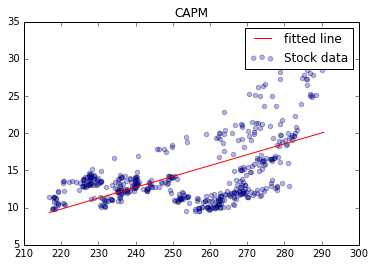

In [41]:
# CAPM
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(benchmark['Adj Close'], dataset['Adj Close'])
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
print("p-value: %f" % p_value)

X2 = np.linspace(benchmark['Adj Close'].min(), benchmark['Adj Close'].max(), 100)
Y_hat = X2 * slope + intercept 

plt.scatter(benchmark['Adj Close'].values, dataset['Adj Close'].values, alpha=0.3, label='Stock data')
plt.plot(X2, Y_hat, 'r', label='fitted line')
plt.title("CAPM")
plt.legend()
plt.show()

In [42]:
# Plot Trendline
# calculate the trendline (it is simply a linear fitting)
coefficients, residuals, _, _, _ = np.polyfit(range(len(dataset.index)), dataset['Adj Close'],1, full=True)

mse = residuals[0]/(len(dataset.index))
nrmse = np.sqrt(mse)/(dataset['Adj Close'].max() - dataset['Adj Close'].min())
print('Slope ' + str(coefficients[0]))
print('Normalized Mean Squared Error (NRMSE): ' + str(nrmse))

Slope 0.0217186149036
Normalized Mean Squared Error (NRMSE): 0.171475186956


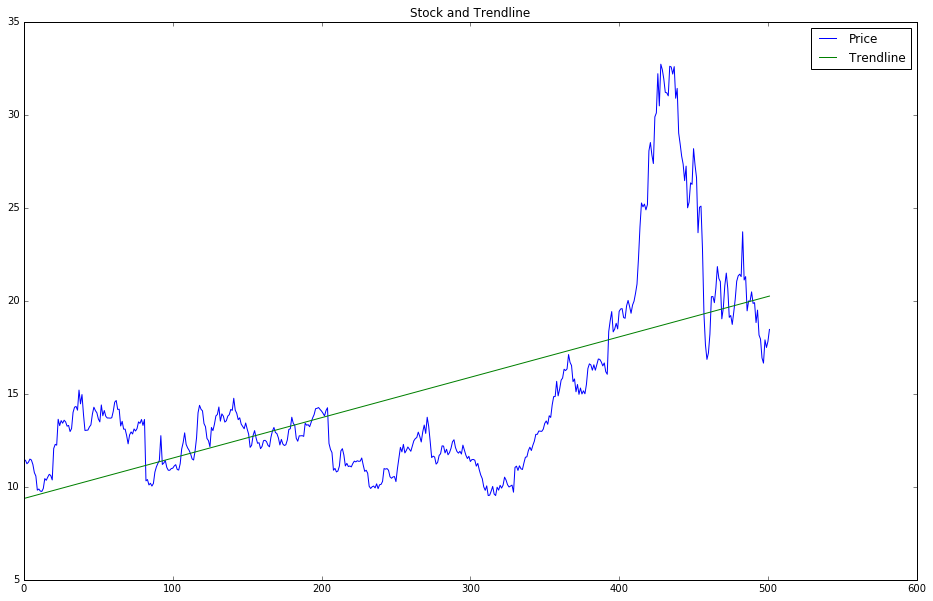

In [43]:
plt.figure(figsize=(16,10))
plt.plot(dataset['Adj Close'].values, label='Price')
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(dataset))], label='Trendline')
plt.title('Stock and Trendline')
plt.legend(loc='best')
plt.show()

In [44]:
dataset.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=502, freq=None)

In [45]:
from scipy.stats import linregress
# # Calculate a linear least-squares regression for two sets of measurements.

data = dataset.copy()
#data = pd.to_datetime(data.index)
data['date_id'] = ((data.index.date - data.index.date.min()))
data['date_id'] = data['date_id'].dt.days + 1

# High trendline
data1 = data.copy()
while len(data1)>3:
    reg = linregress(
                    x=data1['date_id'],
                    y=data1['High'],
                    )
    data1 = data1.loc[data1['High'] > reg[0] * data1['date_id'] + reg[1]]

reg = linregress(
                    x=data1['date_id'],
                    y=data1['High'],
                    )

data['High_Trend'] = reg[0] * data['date_id'] + reg[1]

# Low trendline
data1 = data.copy()

while len(data1)>3:
    reg = linregress(
                    x=data1['date_id'],
                    y=data1['Low'],
                    )
    data1 = data1.loc[data1['Low'] < reg[0] * data1['date_id']+ reg[1]]

reg = linregress(
                    x=data1['date_id'],
                    y=data1['Low'],
                    )

data['Low_Trend'] = reg[0] * data['date_id'] + reg[1]

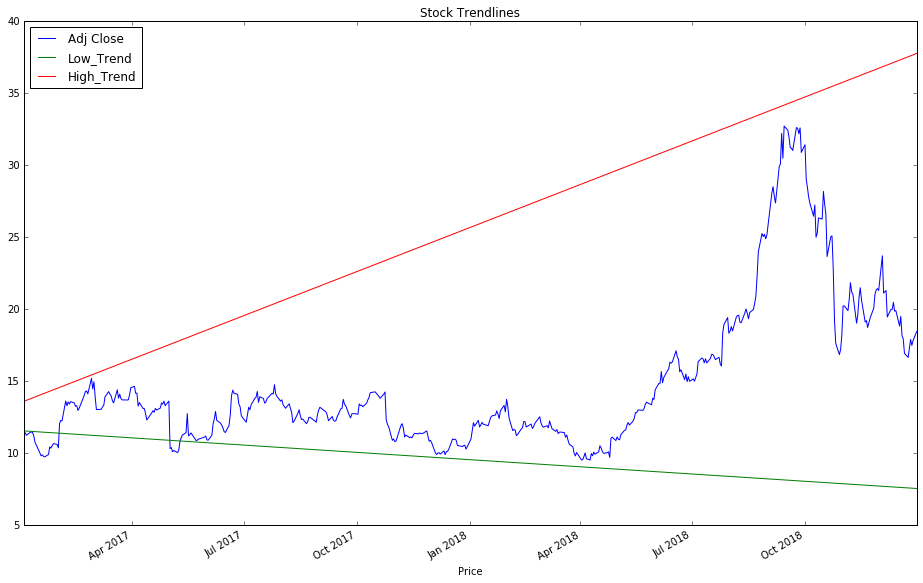

In [46]:
data[['Adj Close', 'Low_Trend','High_Trend']].plot(figsize=(16,10))
plt.xlabel('Price')
plt.title('Stock Trendlines')
plt.show()

In [47]:
data['Trendline'] = [coefficients[0]*x + coefficients[1] for x in range(len(dataset))]

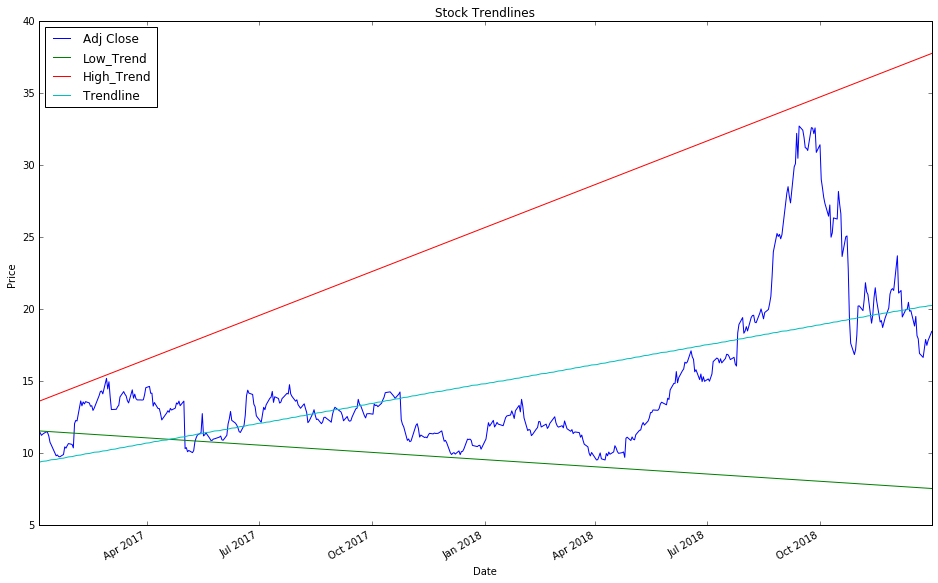

In [48]:
data[['Adj Close', 'Low_Trend','High_Trend','Trendline']].plot(figsize=(16,10))
plt.title('Stock Trendlines')
plt.ylabel('Price')
plt.show()

## Simple Stock Pivot Points

In [49]:
# Floor Pivot Points (Basic Pivot Points) - Support and Resistance
# https://www.investopedia.com/trading/using-pivot-points-for-predictions/
# PP is pivot point
# R is Resistance
# S is Support
PP = pd.Series((dataset['High'] + dataset['Low'] + dataset['Close']) / 3)  
R1 = pd.Series(2 * PP - dataset['Low'])  
S1 = pd.Series(2 * PP - dataset['High'])  
R2 = pd.Series(PP + dataset['High'] - dataset['Low'])  
S2 = pd.Series(PP - dataset['High'] + dataset['Low'])  
R3 = pd.Series(dataset['High'] + 2 * (PP - dataset['Low']))  
S3 = pd.Series(dataset['Low'] - 2 * (dataset['High'] - PP))
R4 = pd.Series(dataset['High'] + 3 * (PP - dataset['Low']))  
S4 = pd.Series(dataset['Low'] - 3 * (dataset['High'] - PP))
R5 = pd.Series(dataset['High'] + 4 * (PP - dataset['Low']))  
S5 = pd.Series(dataset['Low'] - 4 * (dataset['High'] - PP))
P = pd.Series((dataset['Open'] + (dataset['High'] + dataset['Low'] + dataset['Close'])) / 4) # Opening Price Formula
psr = {'P':P, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3,'R4':R4, 'S4':S4,'R5':R5, 'S5':S5}  
PSR = pd.DataFrame(psr)  
dataset = dataset.join(PSR)
print(dataset.head())

             Open   High    Low  Close  Adj Close    Volume   Returns  \
Date                                                                    
2017-01-03  11.42  11.65  11.02  11.43      11.43  55182000       NaN   
2017-01-04  11.45  11.52  11.24  11.43      11.43  40781200  0.000000   
2017-01-05  11.43  11.69  11.23  11.24      11.24  38855200 -0.016623   
2017-01-06  11.29  11.49  11.11  11.32      11.32  34453500  0.007117   
2017-01-09  11.37  11.64  11.31  11.49      11.49  37128000  0.015018   

            Normalize   Max5   Min5    ...             R1         R2  \
Date                                   ...                             
2017-01-03   1.000000    NaN    NaN    ...      11.713333  11.996667   
2017-01-04   1.000000    NaN    NaN    ...      11.553333  11.676667   
2017-01-05   0.983377    NaN    NaN    ...      11.543333  11.846667   
2017-01-06   0.990376    NaN    NaN    ...      11.503333  11.686667   
2017-01-09   1.005249  11.49  11.24    ...      11.65000

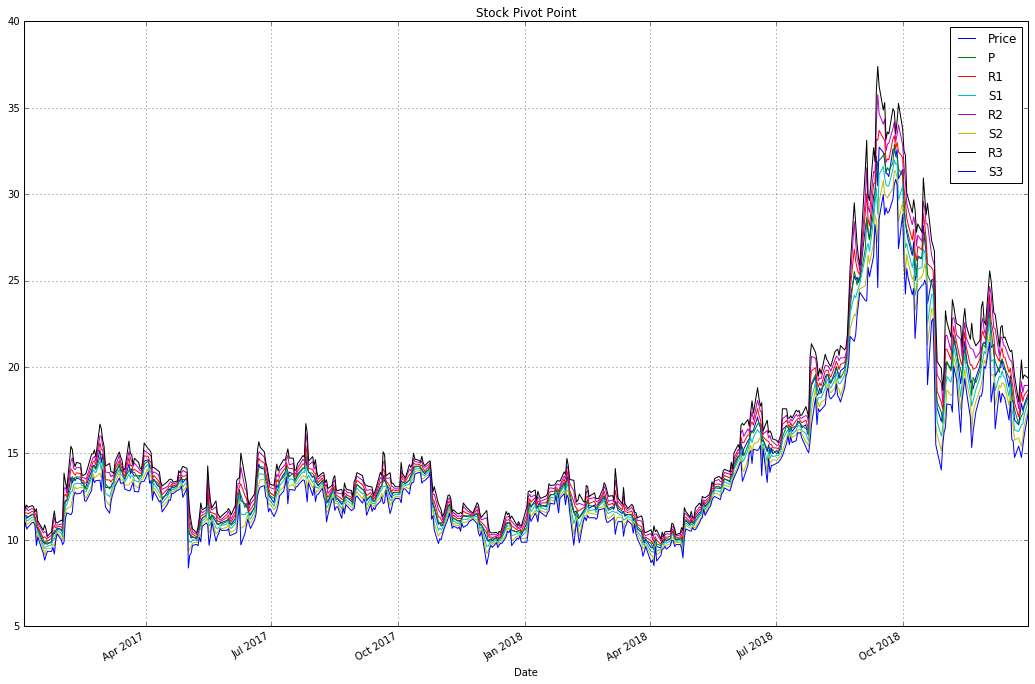

In [50]:
# labels = ['Price','P','R1','S1','R2','S2','R3','S3']
pivot_point = pd.concat([dataset['Adj Close'],P,R1,S1,R2,S2,R3,S3],axis=1).plot(figsize=(18,12),grid=True)
plt.title('Stock Pivot Point')
plt.legend(['Price','P','R1','S1','R2','S2','R3','S3'], loc=0)
plt.show()

In [51]:
dataset['Adj Close']['2018-05-01':'2018-06-01']

Date
2018-05-01    11.13
2018-05-02    10.97
2018-05-03    10.93
2018-05-04    11.28
2018-05-07    11.59
2018-05-08    11.61
2018-05-09    11.95
2018-05-10    12.13
2018-05-11    11.95
2018-05-14    12.23
2018-05-15    12.45
2018-05-16    12.82
2018-05-17    12.82
2018-05-18    13.00
2018-05-21    12.99
2018-05-22    12.98
2018-05-23    13.10
2018-05-24    13.41
2018-05-25    13.54
2018-05-29    13.36
2018-05-30    13.82
2018-05-31    13.73
2018-06-01    14.40
Name: Adj Close, dtype: float64

In [52]:
date_range = dataset[['Adj Close','P','R1','S1','R2','S2','R3','S3']]['2018-05-01':'2018-06-01']# Pick Date Ranges

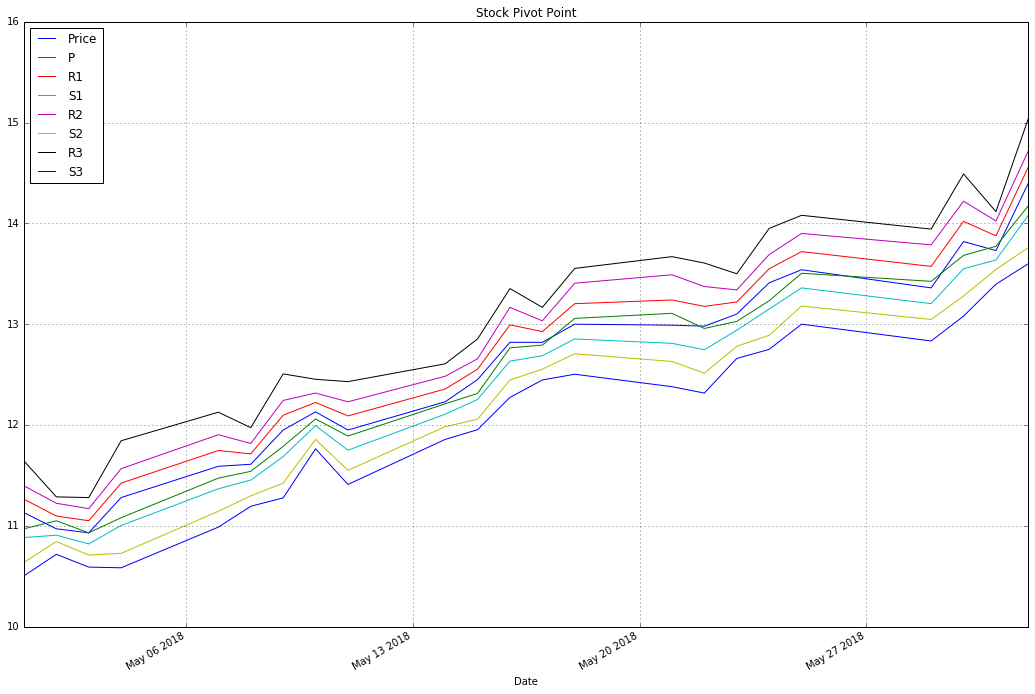

In [53]:
date_range.plot(figsize=(18,12),grid=True)
plt.title('Stock Pivot Point')
plt.legend(['Price','P','R1','S1','R2','S2','R3','S3'], loc=0)
plt.show()

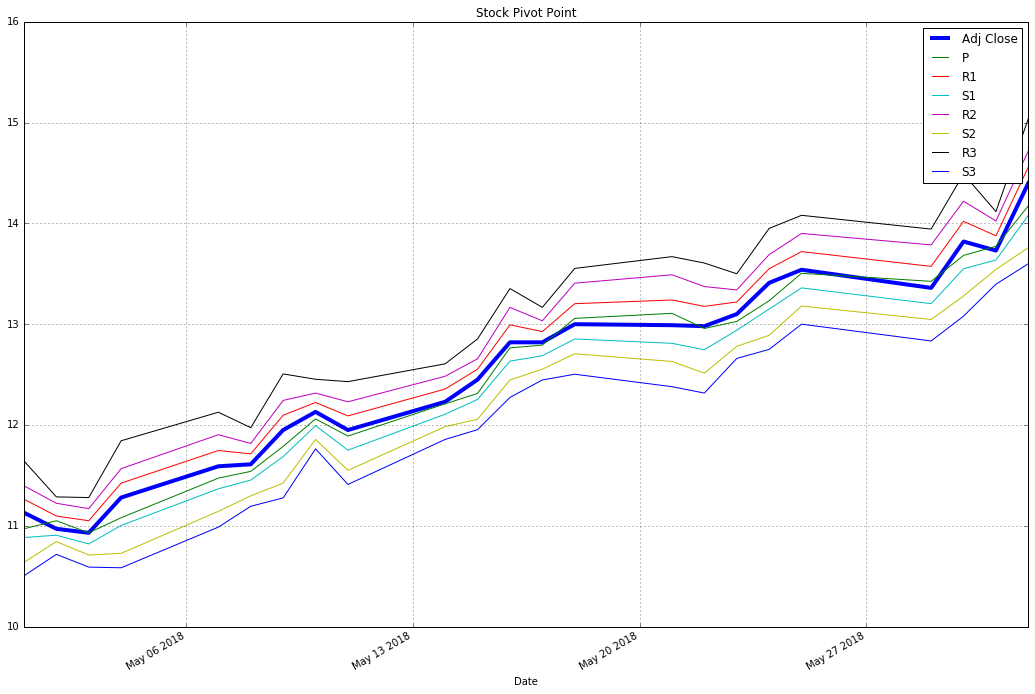

In [54]:
ax = date_range.plot(figsize=(18,12), grid=True) 
ax.lines[0].set_linewidth(4) # Plot Specific Line, 0 represent the first line that is Adj Close and 4 is how thick the line you want to be
plt.title('Stock Pivot Point')
plt.legend()
plt.show()

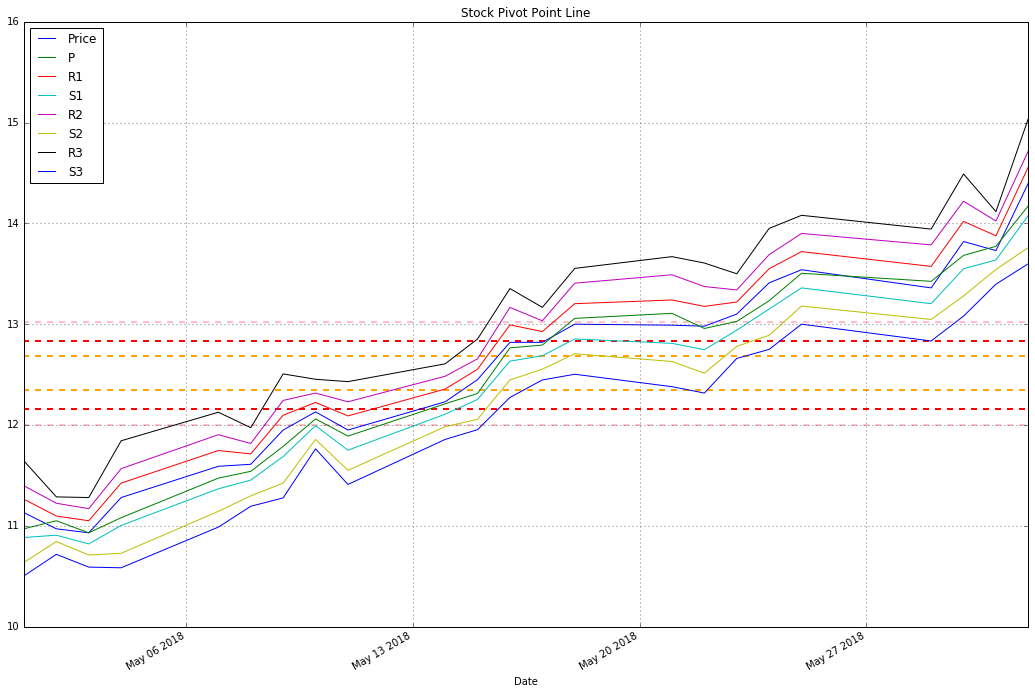

In [55]:
date_range.plot(figsize=(18,12),grid=True)
plt.hlines(date_range['R1'].mean(), xmin=dataset.index[0], xmax=dataset.index[-1], color='orange', label='Resistance 1', linestyle='--', lw=2)
plt.hlines(date_range['S1'].mean(), xmin=dataset.index[0], xmax=dataset.index[-1], color='orange', label='Support 1', linestyle='--', lw=2)
plt.hlines(date_range['R2'].mean(), xmin=dataset.index[0], xmax=dataset.index[-1], color='red', label='Resistance 2', linestyle='--', lw=2)
plt.hlines(date_range['S2'].mean(), xmin=dataset.index[0], xmax=dataset.index[-1], color='red', label='Support 2', linestyle='--', lw=2)
plt.hlines(date_range['R3'].mean(), xmin=dataset.index[0], xmax=dataset.index[-1], color='pink', label='Resistance 3', linestyle='--', lw=2)
plt.hlines(date_range['S3'].mean(), xmin=dataset.index[0], xmax=dataset.index[-1], color='pink', label='Support 3', linestyle='--', lw=2)
plt.title('Stock Pivot Point Line')
plt.legend(['Price','P','R1','S1','R2','S2','R3','S3'], loc=0)
plt.show()